In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import results

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
res = results.Results('ZSPEC0.45_0.6nside1024nJack30','test2',30)

In [3]:
res.load_all_data()

In [21]:
out = res.analyze('v',scale=45,nbins=30,tolerance=.3,ratio=.5)

In [22]:
bins = out[1]

In [23]:
out_vec = []
for res1 in out[0]:
    out_vec.append(res1['zeta'])
out_vec = np.array(out_vec)

In [24]:
out_vec.shape

(30, 30)

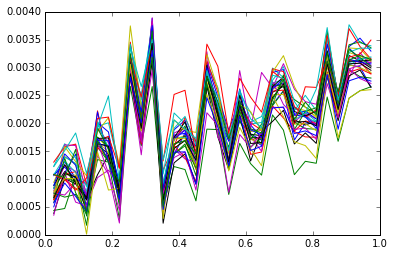

In [25]:
plt.plot(bins,out_vec.T);

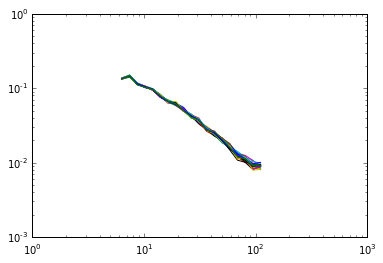

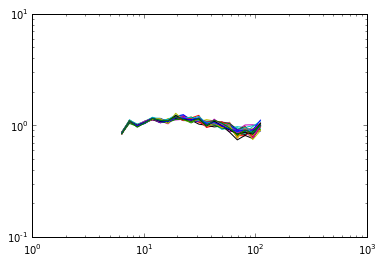

In [49]:
xis = np.array(res.xis).T
plt.loglog(np.exp(res.kk.logr[1:]),xis[1:,:]);
plt.figure()
plt.loglog(np.exp(res.kk.logr[1:]),np.exp(res.kk.logr[1:,np.newaxis])*xis[1:,:]);